# Using ML Techniques for Detecting Type II Diabetes

**Eelis KOSTIAINEN, Khristen THORNBURG**

# Import Data
The data for the analysis of Diabetes is from kaggle (https://www.kaggle.com/uciml/pima-indians-diabetes-database). Import data for analysis.

In [46]:
import numpy as np
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
pima_df = pd.read_csv('/content/drive/My Drive/diabetes.csv')
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Cleaning of Data


# Data Visualization
To get a visualization of the data, start by creating a histogram plot for each of the eight categories in the dataset. This shows the distribution for each variable.

Before analysis starts, it is good to note that some of the categories do not have a Gaussian distribution. Age, pregnency and insulin are the three most obvious categories that are skewed to one side. In this data set, there are many more young patients and far fewer older patients considered. Additionally, Most patients have fewer than five pregnancies. It is also more common for the patients to not require insulin. The categories that appear to have a much more Gaussian distribution are glucose, blood pressure, skin thickness, Diabetes Pedigree Function, and BMI.

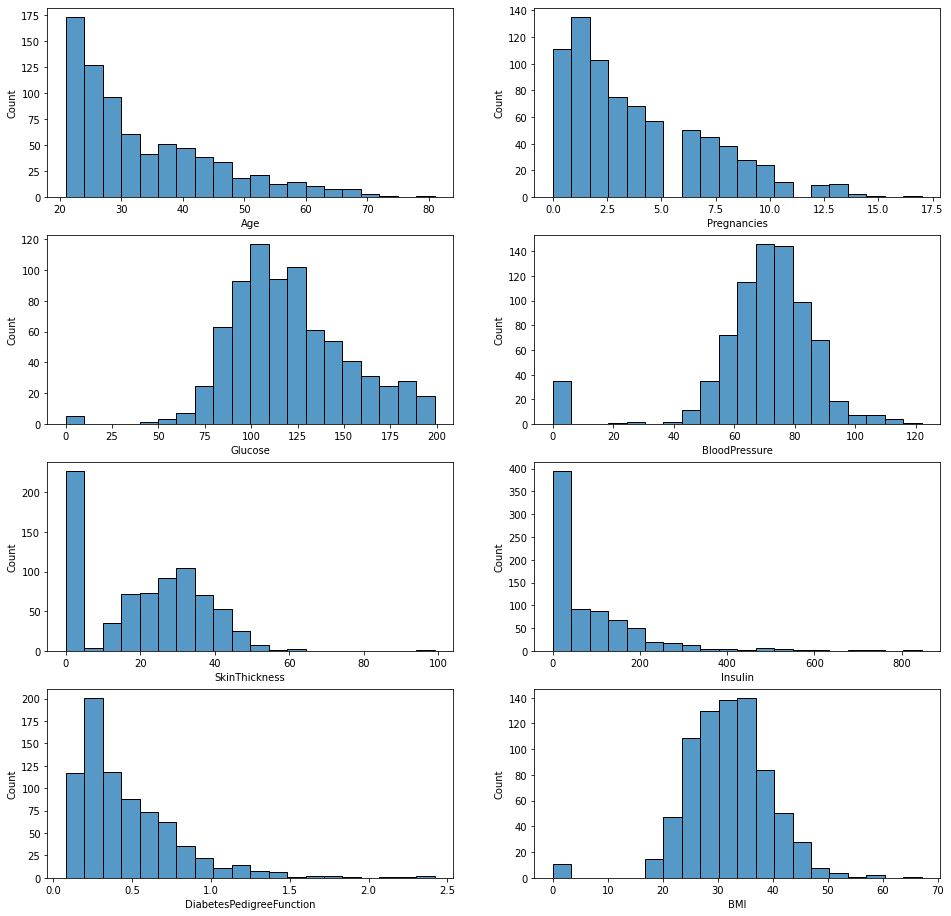

In [60]:
#Visualize data spread by creating a count for each category of data
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(pima_df.Age, bins = 20, ax=ax[0,0]) 
sns.histplot(pima_df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.histplot(pima_df.Glucose, bins = 20, ax=ax[1,0]) 
sns.histplot(pima_df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.histplot(pima_df.SkinThickness, bins = 20, ax=ax[2,0])
sns.histplot(pima_df.Insulin, bins = 20, ax=ax[2,1])
sns.histplot(pima_df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.histplot(pima_df.BMI, bins = 20, ax=ax[3,1]) 

Next, a correlation heatmap was created to see what variables seem to correlate most with the outcome. Based on the correlation map below, it seems that glucose has the highest correlation with outcome, followed by BMI, pregnancies, and Age. Blood Pressure and Skin Thickness don't appear to have much corelation with the outcome. This seems like a logical correlation.

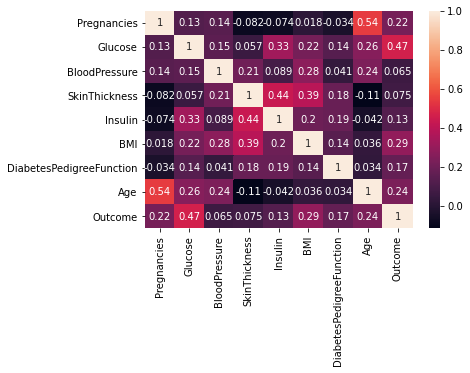

In [52]:
sns.heatmap(pima_df.corr(), annot=True)

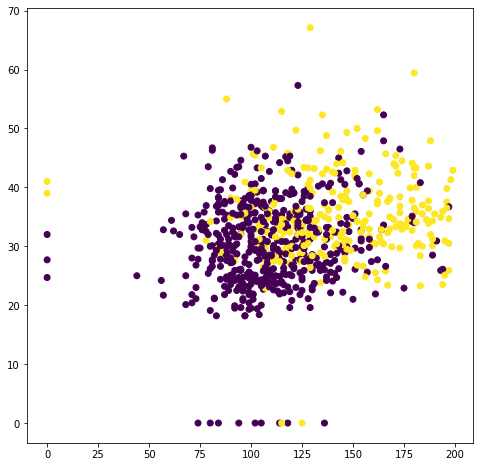

In [45]:
fig = plt.figure(figsize=(8,8))
plt.scatter(pima_df['Glucose'], pima_df['BMI'],c=pima_df['Outcome'])
